In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv(r'C:\Users\Shagun Khandelwal\Project\data\survey.csv')

In [43]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


<Axes: xlabel='Country'>

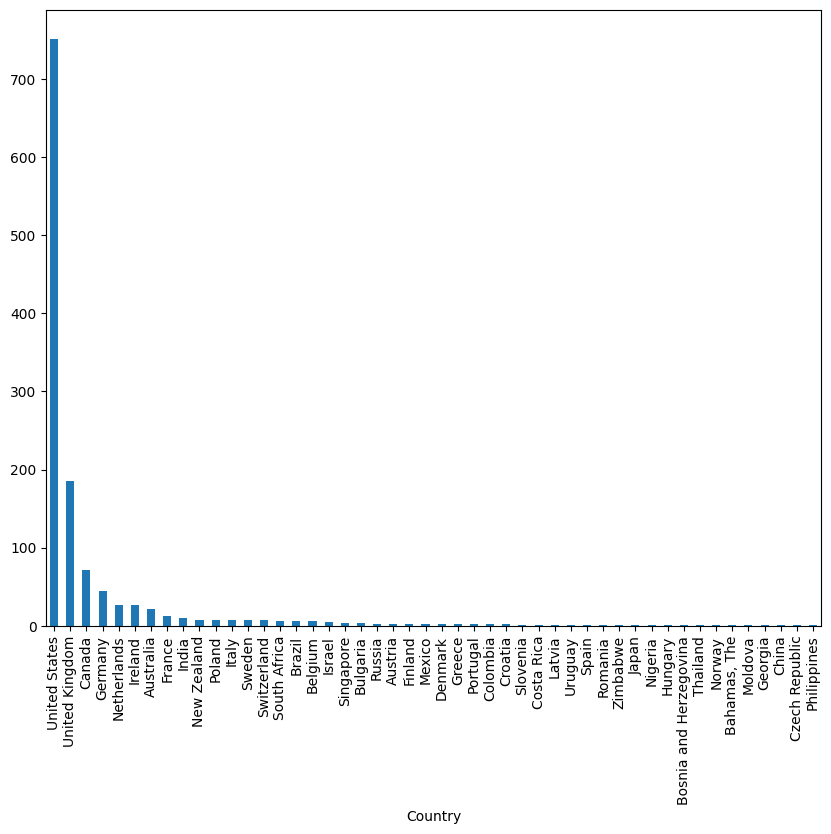

In [3]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [4]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [5]:
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [6]:
data['self_employed'].fillna('No',inplace=True)

C:\Users\Shagun Khandelwal\AppData\Local\Temp\ipykernel_42988\3419051787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['self_employed'].fillna('No',inplace=True)


In [7]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [8]:
data['work_interfere'].fillna('N/A',inplace=True)

C:\Users\Shagun Khandelwal\AppData\Local\Temp\ipykernel_42988\395810941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['work_interfere'].fillna('N/A',inplace=True)


<Axes: xlabel='Age'>

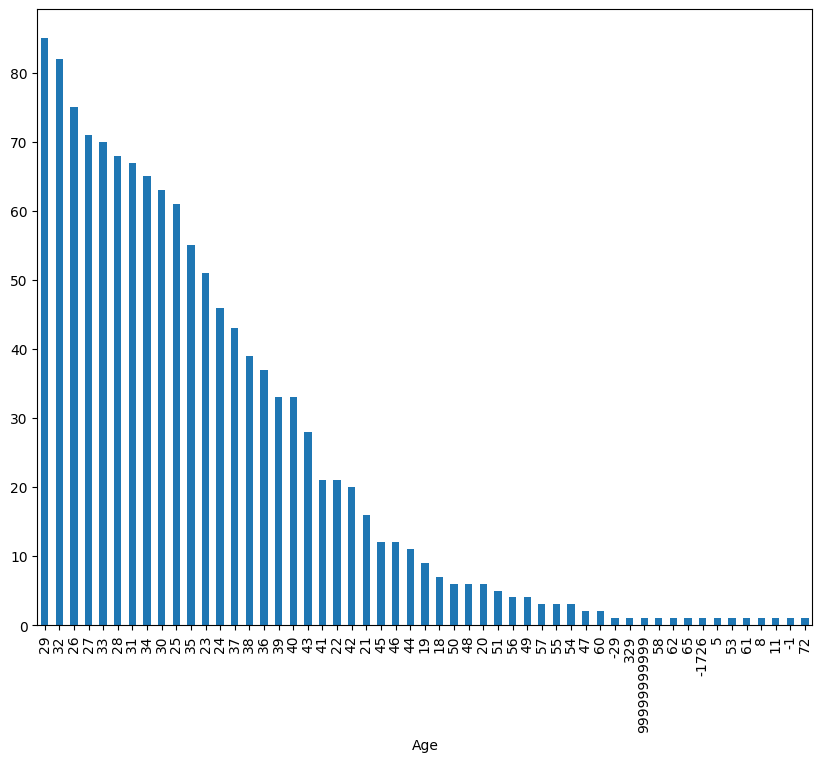

In [9]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [10]:
data.drop(data[(data['Age']>60)| (data['Age']<18)].index,inplace=True)

<Axes: xlabel='Gender'>

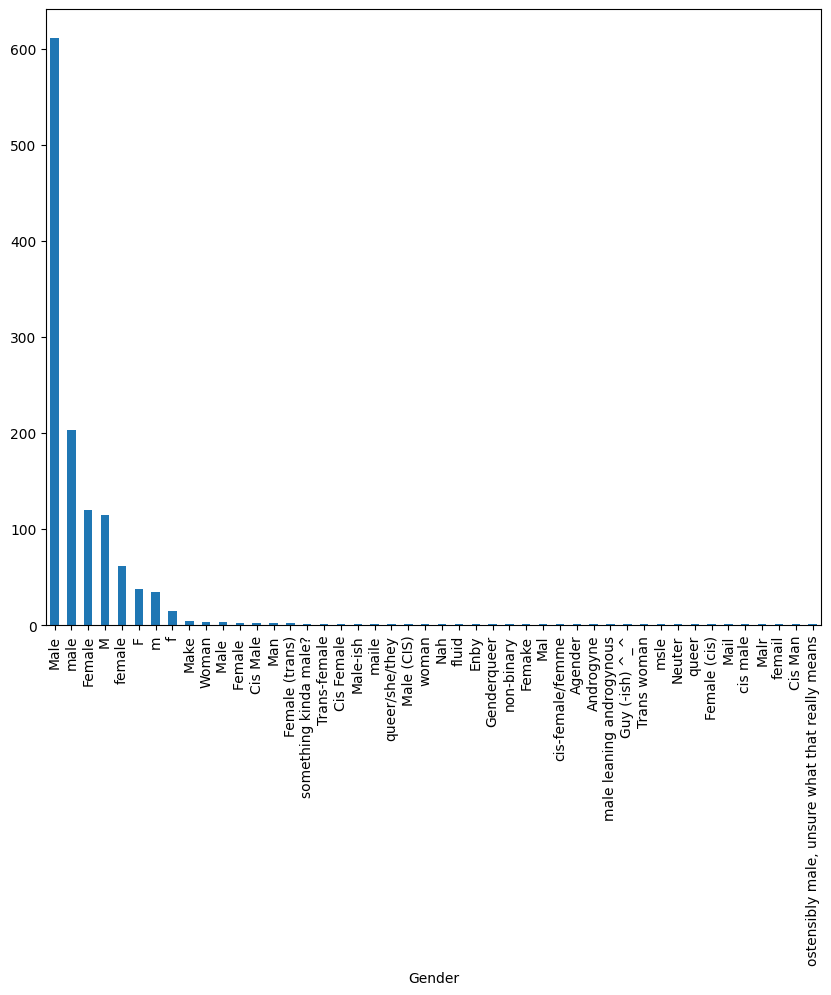

In [11]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [12]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                        'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                        'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make '], 
                       'Male', inplace=True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                        'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                        'woman'], 
                       'Female', inplace=True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                        'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                        'Agender', 'A little about you', 'Nah', 'All',
                        'Ostensibly male, unsure what that really means',
                        'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                        'Guy (-ish) ^_^', 'Trans woman',], 
                       'Non-Binary', inplace=True)

C:\Users\Shagun Khandelwal\AppData\Local\Temp\ipykernel_42988\497025145.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',


Numeric columns: ['Age']
Boxplot after capping: Age


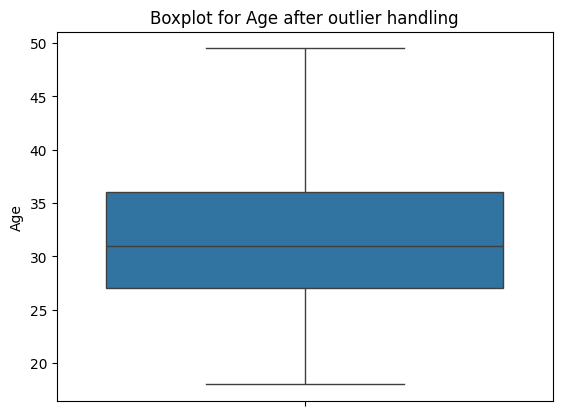

In [ ]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(num_features))


IQR = []
lower = []
upper = []

for col in num_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1
    IQR.append(iqr)
    
    lower.append(Q1 - 1.5 * iqr)
    upper.append(Q3 + 1.5 * iqr)


for i, col in enumerate(num_features):
    data[col] = np.where(data[col] > upper[i], upper[i],
                         np.where(data[col] < lower[i], lower[i], data[col]))


for col in num_features:
    print(f"Boxplot after capping: {col}")
    sb.boxplot(data[col])
    plt.title(f"Boxplot for {col} after outlier handling")
    plt.show()

C:\Users\Shagun Khandelwal\AppData\Local\Temp\ipykernel_42988\3884853087.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])


Text(0.5, 0, 'Age')

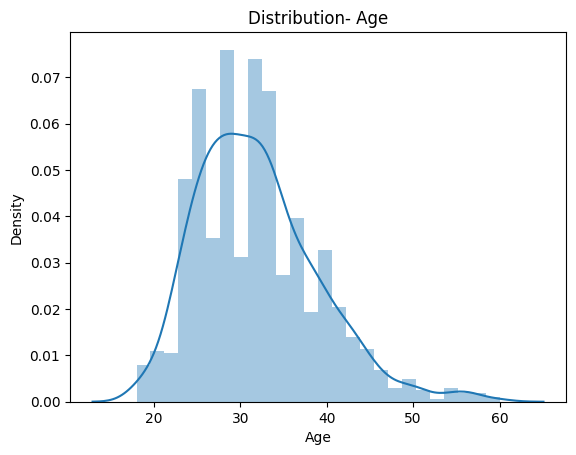

In [13]:
sb.distplot(data["Age"])
plt.title("Distribution- Age")
plt.xlabel("Age")

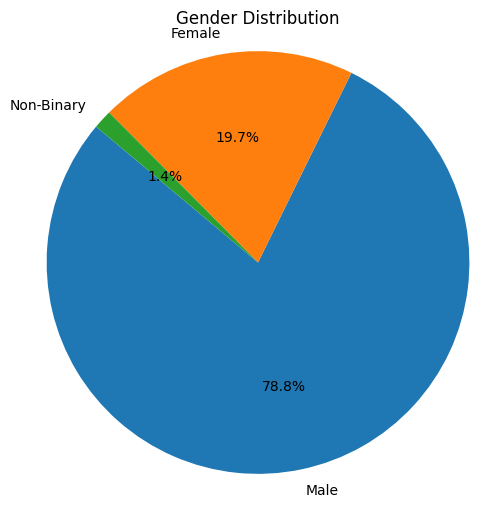

In [56]:
labels = data['Gender'].value_counts().index
sizes = data['Gender'].value_counts().values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")
plt.axis('equal') 
plt.show()

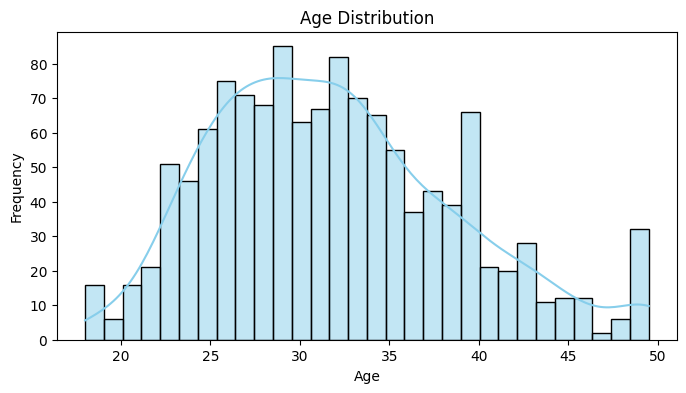

In [57]:
plt.figure(figsize=(8, 4))
sb.histplot(data['Age'], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

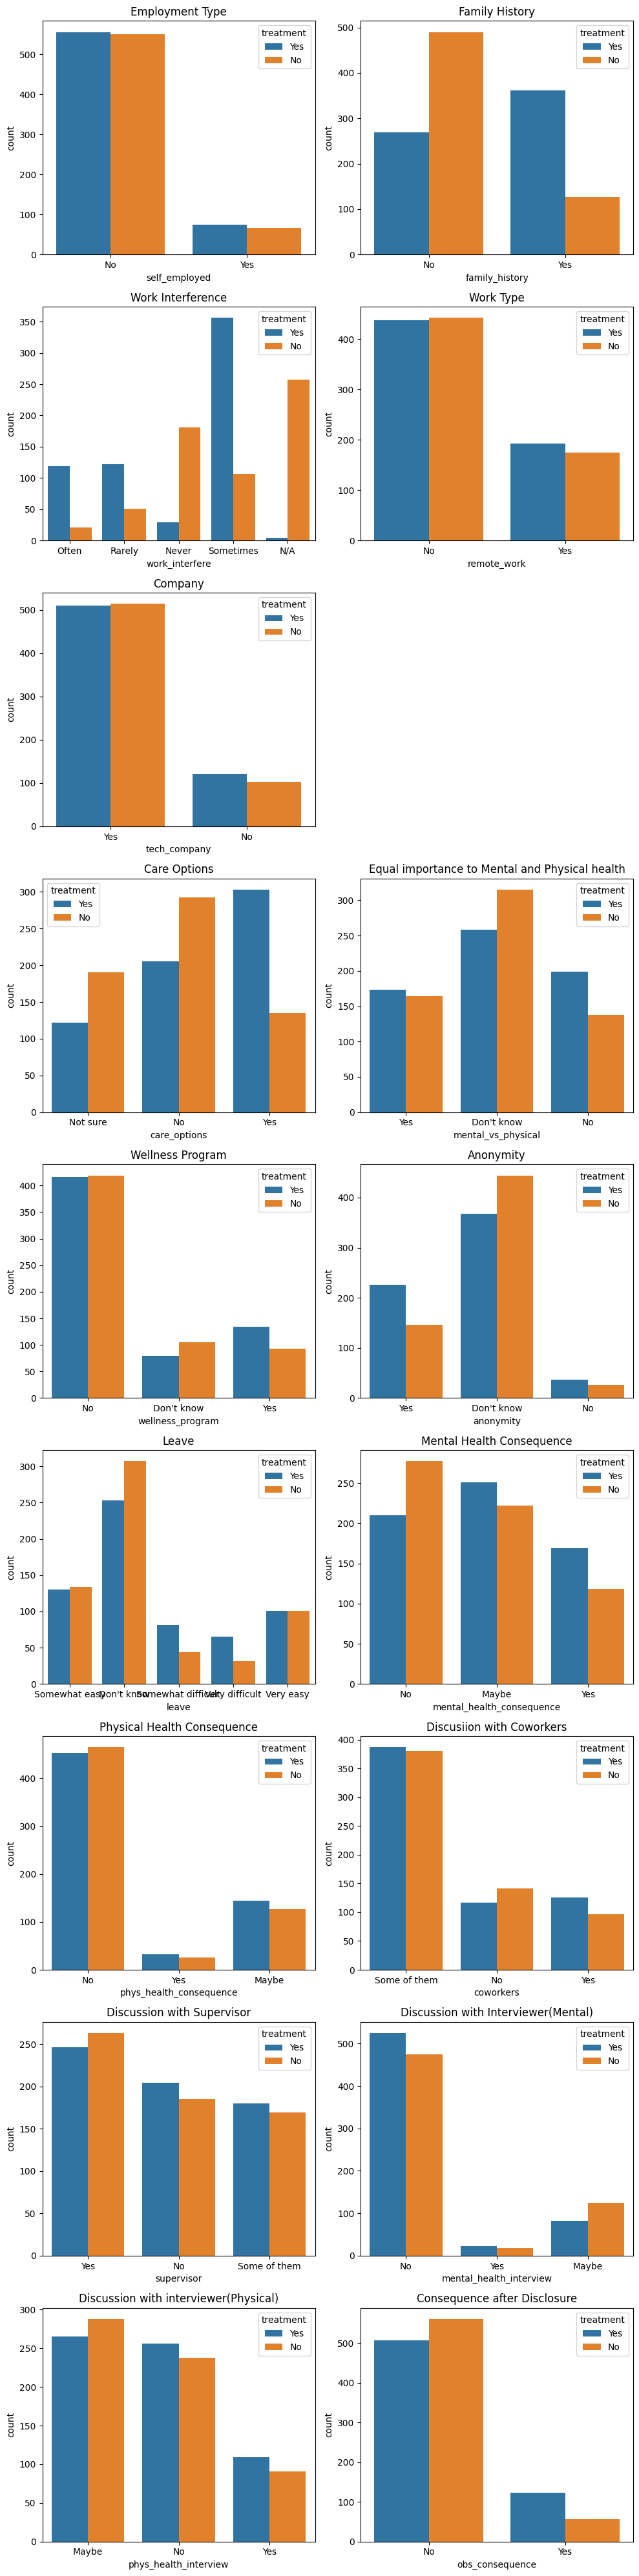

In [15]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data = data, x = 'self_employed', hue='treatment')
plt.title('Employment Type')
plt.subplot(9, 2, 2)
sb.countplot(x='family_history', data=data, hue='treatment')
plt.title('Family History')

plt.subplot(9, 2, 3)
sb.countplot(x='work_interfere', data=data, hue='treatment')
plt.title('Work Interference')

plt.subplot(9, 2, 4)
sb.countplot(x='remote_work', data=data, hue='treatment')
plt.title('Work Type')

plt.subplot(9, 2, 5)
sb.countplot(x='tech_company', data=data, hue='treatment')
plt.title('Company')

plt.subplot(9, 2, 7)
sb.countplot(x='care_options', data=data, hue='treatment')
plt.title('Care Options')

plt.subplot(9, 2, 8)
sb.countplot(x='mental_vs_physical', data=data, hue='treatment')
plt.title('Equal importance to Mental and Physical health')


plt.subplot(9,2,9)
sb.countplot(x='wellness_program',data=data, hue='treatment')
plt.title('Wellness Program')

plt.subplot(9,2,10)
sb.countplot(x='anonymity', data=data,hue='treatment')
plt.title('Anonymity')

plt.subplot(9,2,11)
sb.countplot(x='leave', data=data,hue='treatment')
plt.title('Leave')
plt.subplot(9,2,12)
sb.countplot(x='mental_health_consequence', data=data,hue='treatment')
plt.title('Mental Health Consequence')

plt.subplot(9,2,13)
sb.countplot(x='phys_health_consequence', data=data,hue='treatment')
plt.title('Physical Health Consequence')

plt.subplot(9,2,14)
sb.countplot(x='coworkers', data=data,hue='treatment')
plt.title('Discusiion with Coworkers')

plt.subplot(9,2,15)
sb.countplot(x='supervisor', data=data,hue='treatment')
plt.title('Discussion with Supervisor')

plt.subplot(9,2,16)
sb.countplot(x='mental_health_interview', data=data,hue='treatment')
plt.title('Discussion with Interviewer(Mental)')

plt.subplot(9,2,17)
sb.countplot(x='phys_health_interview', data=data,hue='treatment')
plt.title('Discussion with interviewer(Physical)')

plt.subplot(9,2,18)
sb.countplot(x='obs_consequence', data=data,hue='treatment')
plt.title('Consequence after Disclosure')

plt.tight_layout()
plt.show()

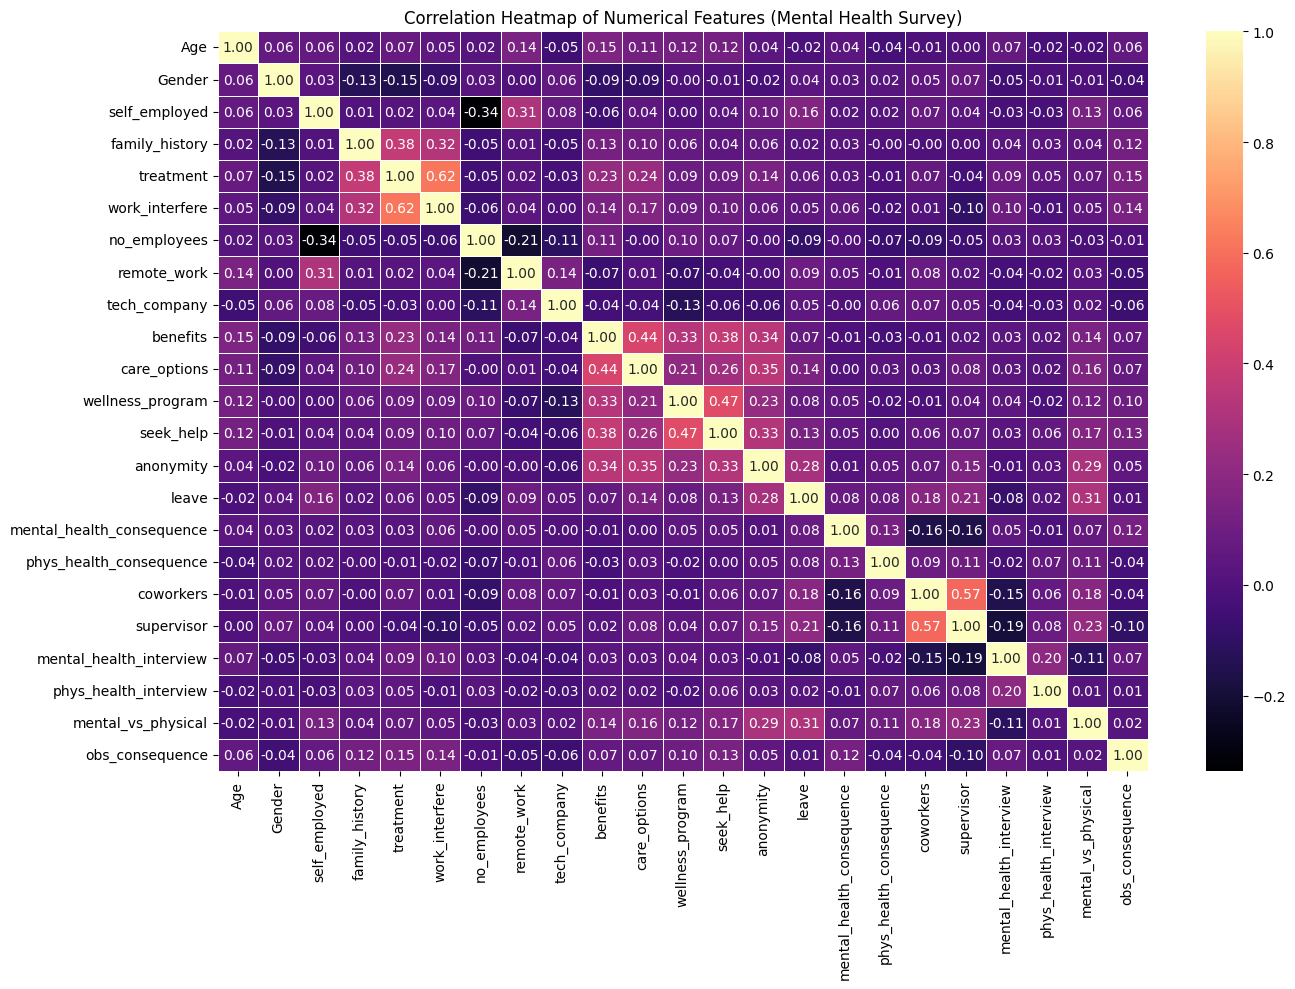

In [ ]:
#multivariate analysis
df_encoded = data.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes


numerical_data = df_encoded.select_dtypes(include='number')

corr_matrix = numerical_data.corr()


plt.figure(figsize=(14, 10))
sb.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features (Mental Health Survey)")
plt.tight_layout()
plt.show()

In [16]:
data.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1247,1247.000000,1247,1247,735,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,161
unique,1235,NaN,5,46,45,2,2,2,5,6,...,5,3,3,3,3,3,3,3,2,157
top,2014-08-27 12:43:28,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,979,743,137,1107,759,630,463,288,...,560,487,918,767,509,1000,553,573,1068,5
mean,NaN,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
X = data.drop('treatment', axis=1)
y = data['treatment']

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


ct = ColumnTransformer([('oe', OrdinalEncoder(), ['Gender', 'self_employed', 'family_history',
    'work_interfere', 'no_employees', 'remote_work', 'tech_company',
    'benefits', 'care_options', 'wellness_program', 'seek_help',
    'anonymity', 'leave', 'mental_health_consequence',
    'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence'])], remainder='passthrough')

X = ct.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(y)


In [65]:
import joblib
joblib.dump(ct, 'feature_values')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=49)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [22]:
# Drop columns that won't be used for prediction
data = data.drop(['Timestamp', 'Country', 'state', 'comments'], axis=1)

# Handle missing values
data['self_employed'].fillna('No', inplace=True)
data['work_interfere'].fillna('N/A', inplace=True)

# Clean Age column
data = data[(data['Age'] >= 18) & (data['Age'] <= 60)]

# Clean Gender column
gender_map = {
    'Male ': 'Male', 'male': 'Male', 'M': 'Male', 'm': 'Male', 
    'Male': 'Male', 'Cis Male': 'Male', 'Man': 'Male', 'cis male': 'Male',
    'Mail': 'Male', 'Male-ish': 'Male', 'Male (CIS)': 'Male',
    'Cis Man': 'Male', 'msle': 'Male', 'Malr': 'Male', 'Mal': 'Male',
    'maile': 'Male', 'Make': 'Male',
    'Female ': 'Female', 'female': 'Female', 'F': 'Female', 'f': 'Female',
    'Woman': 'Female', 'Female': 'Female', 'femail': 'Female',
    'Cis Female': 'Female', 'cis-female/femme': 'Female', 'Femake': 'Female',
    'Female (cis)': 'Female', 'woman': 'Female'
}
data['Gender'] = data['Gender'].map(gender_map).fillna('Non-Binary')

C:\Users\Shagun Khandelwal\AppData\Local\Temp\ipykernel_42988\2921559986.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['self_employed'].fillna('No', inplace=True)
C:\Users\Shagun Khandelwal\AppData\Local\Temp\ipykernel_42988\2921559986.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# List of categorical columns to encode
categorical_cols = [
    'Gender', 'self_employed', 'family_history', 'work_interfere',
    'no_employees', 'remote_work', 'tech_company', 'benefits',
    'care_options', 'wellness_program', 'seek_help', 'anonymity',
    'leave', 'mental_health_consequence', 'phys_health_consequence',
    'coworkers', 'supervisor', 'mental_health_interview',
    'phys_health_interview', 'mental_vs_physical', 'obs_consequence'
]

ct = ColumnTransformer([
    ('encoder', OrdinalEncoder(), categorical_cols)
], remainder='passthrough')

X = ct.fit_transform(data.drop('treatment', axis=1))
y = data['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

In [70]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)


In [71]:
rfc = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=3,
    n_estimators=140,
    random_state=42
)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

In [73]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

In [74]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

nb_train_acc = accuracy_score(y_train, nb.predict(X_train))
nb_test_acc = accuracy_score(y_test, y_pred)

In [75]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

In [76]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

abc_train_acc = accuracy_score(y_train, abc.predict(X_train))
abc_test_acc = accuracy_score(y_test, y_pred)

In [77]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc_train_acc = accuracy_score(y_train, gbc.predict(X_train))
gbc_test_acc = accuracy_score(y_test, y_pred)

In [78]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

c:\Users\Shagun Khandelwal\Project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:12:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
   

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'Naive Bayes': GaussianNB(),
    'SVM': make_pipeline(StandardScaler(), SVC(probability=True)),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier( eval_metric='logloss')
}
for name, model in models.items():
    evaluate_model(model, name)




Decision Tree Accuracy: 0.7627

Random Forest Accuracy: 0.8373

KNN Accuracy: 0.7733

Logistic Regression Accuracy: 0.8507

Naive Bayes Accuracy: 0.8453

SVM Accuracy: 0.8533

AdaBoost Accuracy: 0.8693

Gradient Boosting Accuracy: 0.8400

XGBoost Accuracy: 0.8400


In [26]:
abc = AdaBoostClassifier(random_state=99)
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)
print('Accuracy of AdaBoost-',accuracy_score(y_test,pred_abc))



Accuracy of AdaBoost- 0.8693333333333333


In [27]:
from sklearn.model_selection import RandomizedSearchCV

params_abc = {
    'n_estimators': [int(x) for x in np.linspace(start=1, stop=50, num=15)],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
}

abc_random = RandomizedSearchCV(
    random_state=49,
    estimator=abc,
    param_distributions=params_abc,
    n_iter=50,
    cv=5,
    n_jobs=-1
)
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [28]:
abc_random.fit(X_train, y_train)

,estimator,AdaBoostClass...ndom_state=99)
,param_distributions,"{'learning_rate': [0.97, 0.98, ...], 'n_estimators': [1, 4, ...]}"
,n_iter,50
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,49
,error_score,nan


In [29]:
abc_random.best_params_

{'n_estimators': 46, 'learning_rate': 0.99}

In [30]:
abc_tuned = AdaBoostClassifier(random_state=49, n_estimators=11, learning_rate=1.02)

In [31]:
abc_tuned.fit(X_train, y_train)

,estimator,None
,n_estimators,11
,learning_rate,1.02
,algorithm,'deprecated'
,random_state,49


In [32]:
pred_abc_tuned = abc_tuned.predict(X_test)

In [33]:
print("Accuracy of AdaBoost (tuned):", accuracy_score(y_test, pred_abc_tuned))

Accuracy of AdaBoost (tuned): 0.872


In [34]:
cf_matrix = confusion_matrix(y_test, pred_abc)

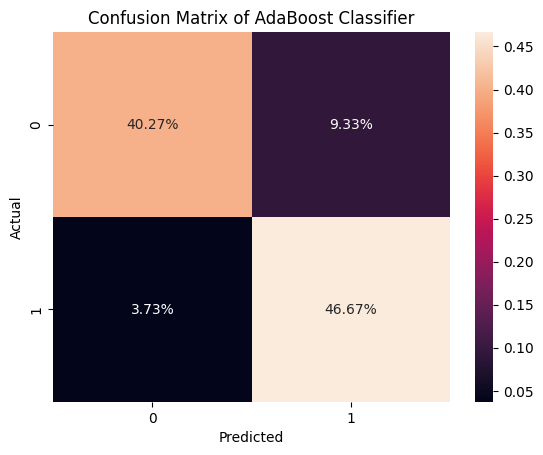

In [35]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
cf_matrix = confusion_matrix(y_test, pred_abc_tuned)


Text(50.722222222222214, 0.5, 'Actual')

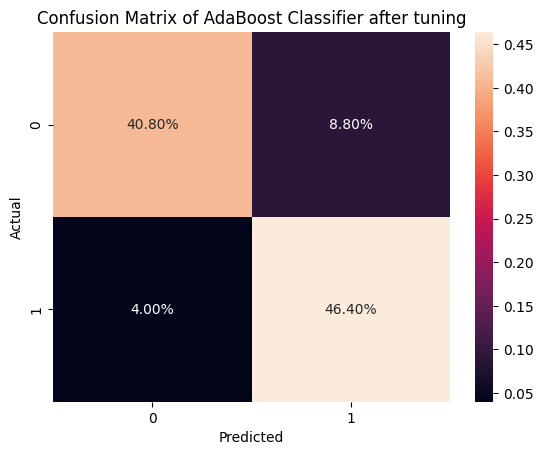

In [36]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier after tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')

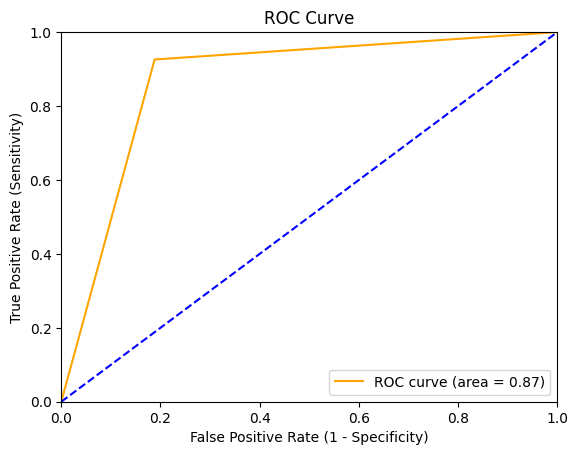

(array([0.        , 0.18817204, 1.        ]),
 array([0.        , 0.92592593, 1.        ]),
 array([inf,  1.,  0.]))

In [37]:
from sklearn import metrics
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc = metrics.auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_abc)

In [38]:
print(classification_report(y_test, pred_abc))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       186
           1       0.83      0.93      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [39]:
print(classification_report(y_test, pred_abc_tuned))
import pickle

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       186
           1       0.84      0.92      0.88       189

    accuracy                           0.87       375
   macro avg       0.88      0.87      0.87       375
weighted avg       0.88      0.87      0.87       375



In [41]:
joblib.dump(abc_tuned, 'model.pkl')
joblib.dump(ct, 'feature_values.joblib')

['feature_values.joblib']